<a href="https://colab.research.google.com/github/2303a52074/Statical-Machine-Learning/blob/main/SML_ASSIGNMENT_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

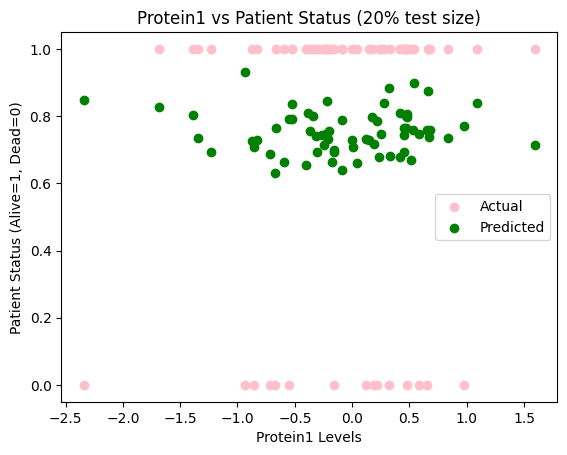

Test Size 20% - MSE: 0.18412985721668024, MAE: 0.36604685941146736
Test Size 25% - MSE: 0.19248131362070206, MAE: 0.37293480459197653


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

file_path = '/content/breast_cancer_survival.csv'
data = pd.read_csv(file_path)

X = data[['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4']]
y = data['Patient_Status'].apply(lambda x: 1 if x == 'Alive' else 0)

X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_25, X_test_25, y_train_25, y_test_25 = train_test_split(X, y, test_size=0.25, random_state=42)

model_20 = LinearRegression()
model_20.fit(X_train_20, y_train_20)

model_25 = LinearRegression()
model_25.fit(X_train_25, y_train_25)

y_pred_20 = model_20.predict(X_test_20)
y_pred_25 = model_25.predict(X_test_25)

mse_20 = mean_squared_error(y_test_20, y_pred_20)
mae_20 = mean_absolute_error(y_test_20, y_pred_20)

mse_25 = mean_squared_error(y_test_25, y_pred_25)
mae_25 = mean_absolute_error(y_test_25, y_pred_25)

plt.scatter(X_test_20['Protein1'], y_test_20, color='pink', label='Actual')
plt.scatter(X_test_20['Protein1'], y_pred_20, color='green', label='Predicted')
plt.xlabel('Protein1 Levels')
plt.ylabel('Patient Status (Alive=1, Dead=0)')
plt.title('Protein1 vs Patient Status (20% test size)')
plt.legend()
plt.show()

print(f"Test Size 20% - MSE: {mse_20}, MAE: {mae_20}")
print(f"Test Size 25% - MSE: {mse_25}, MAE: {mae_25}")

Test size: 20.0% - Accuracy: 77.61%
Test size: 25.0% - Accuracy: 77.38%
Test size: 30.0% - Accuracy: 78.22%
Test size: 40.0% - Accuracy: 76.87%


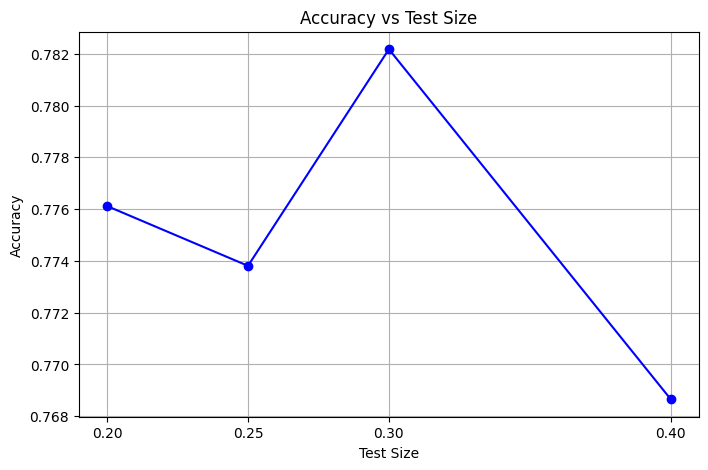

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

file_path = '/content/breast_cancer_survival.csv'
data = pd.read_csv(file_path)

data['Patient_Status'] = data['Patient_Status'].apply(lambda x: 1 if x == 'Alive' else 0)

X = data[['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4']]
y = data['Patient_Status']

def evaluate_logistic_regression(test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

test_sizes = [0.2, 0.25, 0.3, 0.4]
accuracies = []

for test_size in test_sizes:
    accuracy = evaluate_logistic_regression(test_size)
    accuracies.append(accuracy)
    print(f"Test size: {test_size*100}% - Accuracy: {accuracy*100:.2f}%")

plt.figure(figsize=(8, 5))
plt.plot(test_sizes, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs Test Size')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.xticks(test_sizes)
plt.grid(True)
plt.show()